# Classification tensorlow Estimator API

In [1]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [5]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [6]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

### Normalise the continuous data

In [9]:
# Pick the column which we want to normalize.....since group is categorical variable we won't be considering it for normalization
# again we will skip the class as it is the y_label in our case also as Age we want to bin it, we will not be normalizing it 
# but it is a continuous variable.
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [11]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [12]:
import tensorflow as tf

In [13]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [14]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

## Categorical Features

If you know the set of all possible feature values of a column and there are only a few of them, you can use categorical_column_with_vocabulary_list. If you don't know the set of possible values in advance you can use categorical_column_with_hash_bucket

In [15]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

### Converting continuous variable into bins


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

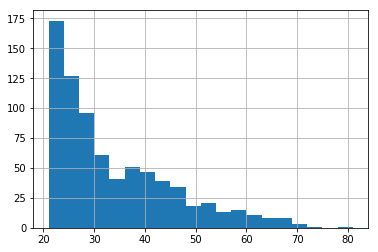

In [18]:
diabetes['Age'].hist(bins=20)

In [21]:
age_buckets = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [22]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [23]:
x_data = diabetes.drop('Class',axis=1)

In [24]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [25]:
labels = diabetes['Class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [28]:
X_train.shape

(537, 9)

### Let us define the input function to be fed into the estimator function of tensorflow

In [30]:
input_func = tf.estimator.inputs.pandas_input_fn(x= X_train,y=y_train, batch_size= 10,num_epochs=1000,shuffle=True)

In [31]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_model_dir': 'C:\\Users\\bhada\\AppData\\Local\\Temp\\tmp9a74074k', '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [32]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\bhada\AppData\Local\Temp\tmp9a74074k\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 116.927
INFO:tensorflow:loss = 3.36944, step = 101 (0.871 sec)
INFO:tensorflow:global_step/sec: 138.785
INFO:tensorflow:loss = 5.39568, step = 201 (0.718 sec)
INFO:tensorflow:global_step/sec: 134.137
INFO:tensorflow:loss = 6.59511, step = 301 (0.748 sec)
INFO:tensorflow:global_step/sec: 122.607
INFO:tensorflow:loss = 5.41668, step = 401 (0.821 sec)
INFO:tensorflow:global_step/sec: 110.94
INFO:tensorflow:loss = 6.70014, step = 501 (0.902 sec)
INFO:tensorflow:global_step/sec: 119.44
INFO:tensorflow:loss = 5.38689, step = 601 (0.822 sec)
INFO:tensorflow:global_step/sec: 107.296
INFO:tensorflow:loss = 6.54197, step = 701 (0.932 sec)
INFO:tensorflow:global_step/sec: 172.36
INFO:tensorflow:loss = 5.54015, step = 801 (0.589 sec)
INFO:tensorflow:global_step/sec: 200.045
INFO:

In [33]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=True)

In [34]:
result = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-11-04-22:27:10
INFO:tensorflow:Restoring parameters from C:\Users\bhada\AppData\Local\Temp\tmp9a74074k\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-11-04-22:28:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.731602, accuracy_baseline = 0.649351, auc = 0.80251, auc_precision_recall = 0.650216, average_loss = 0.523691, global_step = 1000, label/mean = 0.350649, loss = 5.23691, prediction/mean = 0.346601


In [35]:
# lets print out the result generated so far
result

{'accuracy': 0.73160172,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80251026,
 'auc_precision_recall': 0.65021592,
 'average_loss': 0.5236907,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.236907,
 'prediction/mean': 0.34660089}

## Prediction

In [36]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)

In [37]:
predictions = model.predict(pred_input_func)
print(list(predictions))

INFO:tensorflow:Restoring parameters from C:\Users\bhada\AppData\Local\Temp\tmp9a74074k\model.ckpt-1000
[{'class_ids': array([0], dtype=int64), 'logits': array([-0.0474292], dtype=float32), 'logistic': array([ 0.4881449], dtype=float32), 'probabilities': array([ 0.51185507,  0.48814493], dtype=float32), 'classes': array([b'0'], dtype=object)}, {'class_ids': array([1], dtype=int64), 'logits': array([ 0.43274891], dtype=float32), 'logistic': array([ 0.60652989], dtype=float32), 'probabilities': array([ 0.39347011,  0.60652989], dtype=float32), 'classes': array([b'1'], dtype=object)}, {'class_ids': array([0], dtype=int64), 'logits': array([-0.63928837], dtype=float32), 'logistic': array([ 0.34540746], dtype=float32), 'probabilities': array([ 0.65459257,  0.34540743], dtype=float32), 'classes': array([b'0'], dtype=object)}, {'class_ids': array([0], dtype=int64), 'logits': array([-0.8542611], dtype=float32), 'logistic': array([ 0.29853976], dtype=float32), 'probabilities': array([ 0.7014602

# DNN Classifier

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_model_dir': 'C:\\Users\\bhada\\AppData\\Local\\Temp\\tmp8k1muoxd', '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [39]:
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [40]:
embedded_group_column = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [41]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,embedded_group_column, age_buckets]

In [42]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [43]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_model_dir': 'C:\\Users\\bhada\\AppData\\Local\\Temp\\tmpu7njsh2p', '_save_checkpoints_secs': 600, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [44]:
dnn_model.train(input_fn=input_func)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\bhada\AppData\Local\Temp\tmpu7njsh2p\model.ckpt.
INFO:tensorflow:loss = 8.7437, step = 1
INFO:tensorflow:global_step/sec: 103.191
INFO:tensorflow:loss = 7.72143, step = 101 (1.008 sec)
INFO:tensorflow:global_step/sec: 58.2559
INFO:tensorflow:loss = 4.64399, step = 201 (1.698 sec)
INFO:tensorflow:global_step/sec: 141.066
INFO:tensorflow:loss = 6.23344, step = 301 (0.705 sec)
INFO:tensorflow:global_step/sec: 142.783
INFO:tensorflow:loss = 3.32748, step = 401 (0.704 sec)
INFO:tensorflow:global_step/sec: 106.782
INFO:tensorflow:loss = 4.68812, step = 501 (0.932 sec)
INFO:tensorflow:global_step/sec: 116.853
INFO:tensorflow:loss = 4.25778, step = 601 (0.852 sec)
INFO:tensorflow:global_step/sec: 177.295
INFO:tensorflow:loss = 3.71229, step = 701 (0.557 sec)
INFO:tensorflow:global_step/sec: 199.88
INFO:tensorflow:loss = 5.40512, step = 801 (0.495 sec)
INFO:tensorflow:global_step/sec: 202.095
INFO

INFO:tensorflow:global_step/sec: 359.634
INFO:tensorflow:loss = 2.90952, step = 8401 (0.277 sec)
INFO:tensorflow:global_step/sec: 394.982
INFO:tensorflow:loss = 7.33096, step = 8501 (0.256 sec)
INFO:tensorflow:global_step/sec: 406.252
INFO:tensorflow:loss = 2.5257, step = 8601 (0.247 sec)
INFO:tensorflow:global_step/sec: 341.555
INFO:tensorflow:loss = 5.12759, step = 8701 (0.291 sec)
INFO:tensorflow:global_step/sec: 381.352
INFO:tensorflow:loss = 2.22535, step = 8801 (0.263 sec)
INFO:tensorflow:global_step/sec: 368.757
INFO:tensorflow:loss = 3.26664, step = 8901 (0.271 sec)
INFO:tensorflow:global_step/sec: 370.759
INFO:tensorflow:loss = 2.46473, step = 9001 (0.267 sec)
INFO:tensorflow:global_step/sec: 392.652
INFO:tensorflow:loss = 2.27284, step = 9101 (0.257 sec)
INFO:tensorflow:global_step/sec: 349.326
INFO:tensorflow:loss = 4.16763, step = 9201 (0.286 sec)
INFO:tensorflow:global_step/sec: 356.837
INFO:tensorflow:loss = 4.04697, step = 9301 (0.280 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 318.341
INFO:tensorflow:loss = 3.78549, step = 16801 (0.316 sec)
INFO:tensorflow:global_step/sec: 267.71
INFO:tensorflow:loss = 2.30249, step = 16901 (0.371 sec)
INFO:tensorflow:global_step/sec: 282.968
INFO:tensorflow:loss = 3.94392, step = 17001 (0.359 sec)
INFO:tensorflow:global_step/sec: 269.189
INFO:tensorflow:loss = 1.82726, step = 17101 (0.364 sec)
INFO:tensorflow:global_step/sec: 434.571
INFO:tensorflow:loss = 1.29834, step = 17201 (0.229 sec)
INFO:tensorflow:global_step/sec: 359.403
INFO:tensorflow:loss = 5.13703, step = 17301 (0.280 sec)
INFO:tensorflow:global_step/sec: 431.748
INFO:tensorflow:loss = 2.70976, step = 17401 (0.231 sec)
INFO:tensorflow:global_step/sec: 249.024
INFO:tensorflow:loss = 3.61605, step = 17501 (0.402 sec)
INFO:tensorflow:global_step/sec: 447.236
INFO:tensorflow:loss = 0.949896, step = 17601 (0.223 sec)
INFO:tensorflow:global_step/sec: 356.832
INFO:tensorflow:loss = 3.81604, step = 17701 (0.280 sec)
INFO:tensorflow:glob

INFO:tensorflow:global_step/sec: 277.789
INFO:tensorflow:loss = 3.05912, step = 25201 (0.356 sec)
INFO:tensorflow:global_step/sec: 328.39
INFO:tensorflow:loss = 3.40468, step = 25301 (0.306 sec)
INFO:tensorflow:global_step/sec: 276.654
INFO:tensorflow:loss = 2.44172, step = 25401 (0.365 sec)
INFO:tensorflow:global_step/sec: 230.067
INFO:tensorflow:loss = 3.92233, step = 25501 (0.430 sec)
INFO:tensorflow:global_step/sec: 344.504
INFO:tensorflow:loss = 1.06824, step = 25601 (0.291 sec)
INFO:tensorflow:global_step/sec: 277.421
INFO:tensorflow:loss = 1.50358, step = 25701 (0.363 sec)
INFO:tensorflow:global_step/sec: 305.466
INFO:tensorflow:loss = 3.38684, step = 25801 (0.322 sec)
INFO:tensorflow:global_step/sec: 370.87
INFO:tensorflow:loss = 2.6382, step = 25901 (0.271 sec)
INFO:tensorflow:global_step/sec: 341.501
INFO:tensorflow:loss = 4.79298, step = 26001 (0.291 sec)
INFO:tensorflow:global_step/sec: 248.095
INFO:tensorflow:loss = 3.02272, step = 26101 (0.409 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 226.411
INFO:tensorflow:loss = 3.51466, step = 33601 (0.434 sec)
INFO:tensorflow:global_step/sec: 216.108
INFO:tensorflow:loss = 1.01292, step = 33701 (0.464 sec)
INFO:tensorflow:global_step/sec: 194.413
INFO:tensorflow:loss = 5.12414, step = 33801 (0.519 sec)
INFO:tensorflow:global_step/sec: 212.2
INFO:tensorflow:loss = 4.87192, step = 33901 (0.466 sec)
INFO:tensorflow:global_step/sec: 274.747
INFO:tensorflow:loss = 0.882145, step = 34001 (0.366 sec)
INFO:tensorflow:global_step/sec: 215.875
INFO:tensorflow:loss = 4.88752, step = 34101 (0.468 sec)
INFO:tensorflow:global_step/sec: 229.275
INFO:tensorflow:loss = 2.24264, step = 34201 (0.431 sec)
INFO:tensorflow:global_step/sec: 224.675
INFO:tensorflow:loss = 3.47428, step = 34301 (0.445 sec)
INFO:tensorflow:global_step/sec: 212.637
INFO:tensorflow:loss = 3.51609, step = 34401 (0.469 sec)
INFO:tensorflow:global_step/sec: 227.461
INFO:tensorflow:loss = 2.80004, step = 34501 (0.439 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 399.778
INFO:tensorflow:loss = 9.24663, step = 42001 (0.250 sec)
INFO:tensorflow:global_step/sec: 408.736
INFO:tensorflow:loss = 1.2858, step = 42101 (0.247 sec)
INFO:tensorflow:global_step/sec: 400.55
INFO:tensorflow:loss = 5.9189, step = 42201 (0.248 sec)
INFO:tensorflow:global_step/sec: 372.838
INFO:tensorflow:loss = 3.58583, step = 42301 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.929
INFO:tensorflow:loss = 1.28685, step = 42401 (0.270 sec)
INFO:tensorflow:global_step/sec: 385.819
INFO:tensorflow:loss = 6.04273, step = 42501 (0.257 sec)
INFO:tensorflow:global_step/sec: 420.82
INFO:tensorflow:loss = 2.22499, step = 42601 (0.240 sec)
INFO:tensorflow:global_step/sec: 421.708
INFO:tensorflow:loss = 1.64824, step = 42701 (0.237 sec)
INFO:tensorflow:global_step/sec: 398.139
INFO:tensorflow:loss = 2.41861, step = 42801 (0.249 sec)
INFO:tensorflow:global_step/sec: 374.008
INFO:tensorflow:loss = 5.33655, step = 42901 (0.266 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 342.142
INFO:tensorflow:loss = 2.80274, step = 50401 (0.292 sec)
INFO:tensorflow:global_step/sec: 403.781
INFO:tensorflow:loss = 0.76224, step = 50501 (0.247 sec)
INFO:tensorflow:global_step/sec: 399.736
INFO:tensorflow:loss = 1.39343, step = 50601 (0.250 sec)
INFO:tensorflow:global_step/sec: 397.347
INFO:tensorflow:loss = 3.65386, step = 50701 (0.252 sec)
INFO:tensorflow:global_step/sec: 358.111
INFO:tensorflow:loss = 2.73691, step = 50801 (0.279 sec)
INFO:tensorflow:global_step/sec: 410.429
INFO:tensorflow:loss = 1.25753, step = 50901 (0.246 sec)
INFO:tensorflow:global_step/sec: 387.315
INFO:tensorflow:loss = 5.63261, step = 51001 (0.256 sec)
INFO:tensorflow:global_step/sec: 400.536
INFO:tensorflow:loss = 1.01832, step = 51101 (0.250 sec)
INFO:tensorflow:global_step/sec: 410.431
INFO:tensorflow:loss = 3.60285, step = 51201 (0.244 sec)
INFO:tensorflow:global_step/sec: 400.492
INFO:tensorflow:loss = 3.90099, step = 51301 (0.250 sec)
INFO:tensorflow:glob

In [45]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1000,shuffle=False)

In [47]:
result = dnn_model.evaluate(eval_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2017-11-04-22:52:04
INFO:tensorflow:Restoring parameters from C:\Users\bhada\AppData\Local\Temp\tmpu7njsh2p\model.ckpt-53700
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/

INFO:tensorflow:Evaluation [212/1000]
INFO:tensorflow:Evaluation [213/1000]
INFO:tensorflow:Evaluation [214/1000]
INFO:tensorflow:Evaluation [215/1000]
INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [427/1000]
INFO:tensorflow:Evaluation [428/1000]
INFO:tensorflow:Evaluation [429/1000]
INFO:tensorflow:Evaluation [430/1000]
INFO:tensorflow:Evaluation [431/1000]
INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [643/1000]
INFO:tensorflow:Evaluation [644/1000]
INFO:tensorflow:Evaluation [645/1000]
INFO:tensorflow:Evaluation [646/1000]
INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [859/1000]
INFO:tensorflow:Evaluation [860/1000]
INFO:tensorflow:Evaluation [861/1000]
INFO:tensorflow:Evaluation [862/1000]
INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorf

# Done 